<a href="https://colab.research.google.com/github/Meera-Ajay-25/Machine-Learning-projects/blob/main/Campus_placement_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Project 1: **Analysis on campus Recruitment Data of Mba students**

Algorithm Used: **KNearest Neighbors**,**SVM** and **Naive Bayes**
Steps: 

*   Loading the Dataset using Pandas library
*   Preprocessing the dataset


*   Applying two sampling techniques to balance the dataset which is SMOTE and RandomUnderSampler 





*   Scaling the dataset using MinMax scaler
*   Splitting the dataset


*   Model building using Knn Algorithm
*   Testing the accurcay of the algorithm and constructing confusion matrix












In [1]:
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

In [2]:
#loading the dataset
df=pd.read_csv("/content/Placement_Data_Full_Class.csv")
df

,sl_no,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
0,1,M,67.00,Others,91.00,Others,Commerce,58.00,Sci&Tech,No,55.0,Mkt&HR,58.80,Placed,270000
1,2,M,79.33,Central,78.33,Others,Science,77.48,Sci&Tech,Yes,86.5,Mkt&Fin,66.28,Placed,200000
2,3,M,65.00,Central,68.00,Central,Arts,64.00,Comm&Mgmt,No,75.0,Mkt&Fin,57.80,Placed,250000
3,4,M,56.00,Central,52.00,Central,Science,52.00,Sci&Tech,No,66.0,Mkt&HR,59.43,Not Placed,300000
4,5,M,85.80,Central,73.60,Central,Commerce,73.30,Comm&Mgmt,No,96.8,Mkt&Fin,55.50,Placed,425000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
210,211,M,80.60,Others,82.00,Others,Commerce,77.60,Comm&Mgmt,No,91.0,Mkt&Fin,74.49,Placed,400000
211,212,M,58.00,Others,60.00,Others,Science,72.00,Sci&Tech,No,74.0,Mkt&Fin,53.62,Placed,275000
212,213,M,67.00,Others,67.00,Others,Commerce,73.00,Comm&Mgmt,Yes,59.0,Mkt&Fin,69.72,Placed,295000
213,214,F,74.00,Others,66.00,Others,Commerce,58.00,Comm&Mgmt,No,70.0,Mkt&HR,60.23,Placed,204000


**Data Preprocessing**

In [3]:
df.shape

(215, 15)

In [4]:
df.dtypes

sl_no               int64
gender             object
ssc_p             float64
ssc_b              object
hsc_p             float64
hsc_b              object
hsc_s              object
degree_p          float64
degree_t           object
workex             object
etest_p           float64
specialisation     object
mba_p             float64
status             object
salary              int64
dtype: object

In [5]:
df.isna().sum()

sl_no             0
gender            0
ssc_p             0
ssc_b             0
hsc_p             0
hsc_b             0
hsc_s             0
degree_p          0
degree_t          0
workex            0
etest_p           0
specialisation    0
mba_p             0
status            0
salary            0
dtype: int64

In [6]:
df1=df.copy()
df1.drop(['sl_no','ssc_b','hsc_b'],axis=1,inplace=True)
df1

,gender,ssc_p,hsc_p,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
0,M,67.00,91.00,Commerce,58.00,Sci&Tech,No,55.0,Mkt&HR,58.80,Placed,270000
1,M,79.33,78.33,Science,77.48,Sci&Tech,Yes,86.5,Mkt&Fin,66.28,Placed,200000
2,M,65.00,68.00,Arts,64.00,Comm&Mgmt,No,75.0,Mkt&Fin,57.80,Placed,250000
3,M,56.00,52.00,Science,52.00,Sci&Tech,No,66.0,Mkt&HR,59.43,Not Placed,300000
4,M,85.80,73.60,Commerce,73.30,Comm&Mgmt,No,96.8,Mkt&Fin,55.50,Placed,425000
...,...,...,...,...,...,...,...,...,...,...,...,...
210,M,80.60,82.00,Commerce,77.60,Comm&Mgmt,No,91.0,Mkt&Fin,74.49,Placed,400000
211,M,58.00,60.00,Science,72.00,Sci&Tech,No,74.0,Mkt&Fin,53.62,Placed,275000
212,M,67.00,67.00,Commerce,73.00,Comm&Mgmt,Yes,59.0,Mkt&Fin,69.72,Placed,295000
213,F,74.00,66.00,Commerce,58.00,Comm&Mgmt,No,70.0,Mkt&HR,60.23,Placed,204000


In [7]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
lst=['gender','hsc_s','degree_t','workex','specialisation','status']
for i in lst:
  df1[i]=le.fit_transform(df1[i])

In [8]:
df1

,gender,ssc_p,hsc_p,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
0,1,67.00,91.00,1,58.00,2,0,55.0,1,58.80,1,270000
1,1,79.33,78.33,2,77.48,2,1,86.5,0,66.28,1,200000
2,1,65.00,68.00,0,64.00,0,0,75.0,0,57.80,1,250000
3,1,56.00,52.00,2,52.00,2,0,66.0,1,59.43,0,300000
4,1,85.80,73.60,1,73.30,0,0,96.8,0,55.50,1,425000
...,...,...,...,...,...,...,...,...,...,...,...,...
210,1,80.60,82.00,1,77.60,0,0,91.0,0,74.49,1,400000
211,1,58.00,60.00,2,72.00,2,0,74.0,0,53.62,1,275000
212,1,67.00,67.00,1,73.00,0,1,59.0,0,69.72,1,295000
213,0,74.00,66.00,1,58.00,0,0,70.0,1,60.23,1,204000


In [11]:
df1.dtypes

gender              int64
ssc_p             float64
hsc_p             float64
hsc_s               int64
degree_p          float64
degree_t            int64
workex              int64
etest_p           float64
specialisation      int64
mba_p             float64
status              int64
salary              int64
dtype: object

In [10]:
#Filling the missing values in the column salary
df1['salary']=df1['salary'].fillna(df1['salary'].mode()[0])

**Model building using KNN**

In [12]:
X=df1.iloc[:,:10]
y=df1.iloc[:,-2]

In [14]:
y.value_counts()

1    148
0     67
Name: status, dtype: int64

In [13]:
#scaling the dataset using Min-Max scaler
from sklearn.preprocessing import MinMaxScaler
ms=MinMaxScaler()
X_sc=ms.fit_transform(X)
X_sc

array([[1.        , 0.53823954, 0.88962109, ..., 0.10416667, 1.        ,
        0.28448276],
       [1.        , 0.79241394, 0.68088962, ..., 0.76041667, 0.        ,
        0.56484258],
       [1.        , 0.49701093, 0.5107084 , ..., 0.52083333, 0.        ,
        0.2470015 ],
       ...,
       [1.        , 0.53823954, 0.49423394, ..., 0.1875    , 0.        ,
        0.69377811],
       [0.        , 0.68253968, 0.47775947, ..., 0.41666667, 1.        ,
        0.33808096],
       [1.        , 0.43516801, 0.34596376, ..., 0.8125    , 1.        ,
        0.33770615]])

In [16]:
#splitting the dataset to train data and test data
from sklearn.model_selection import train_test_split 
X_train,X_test,y_train,y_test=train_test_split(X_sc,y,test_size=0.2,random_state=1)

In [34]:
#Using KNN model
from sklearn.neighbors import KNeighborsClassifier
Knn=KNeighborsClassifier(n_neighbors=5)
Knn.fit(X_train,y_train)
y_pred=Knn.predict(X_test)
y_pred

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1])

              precision    recall  f1-score   support

           0       0.89      0.53      0.67        15
           1       0.79      0.96      0.87        28

    accuracy                           0.81        43
   macro avg       0.84      0.75      0.77        43
weighted avg       0.83      0.81      0.80        43



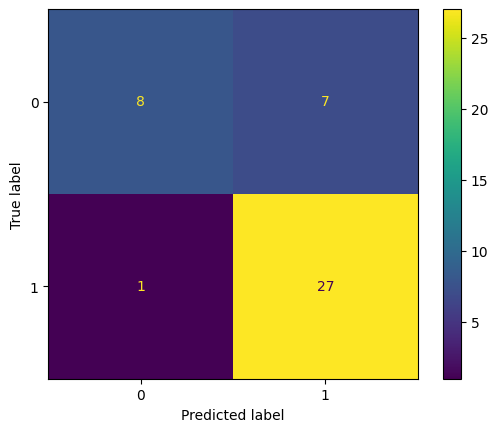

In [35]:
#plotting confusion matrix and finding classification report
from sklearn.metrics import ConfusionMatrixDisplay,classification_report
print(classification_report(y_test,y_pred))
print(ConfusionMatrixDisplay.from_predictions(y_test,y_pred))

In [24]:
#using SVM model
from sklearn.svm import SVC
sv=SVC()
sv.fit(X_train,y_train)
y_pred1=sv.predict(X_test)
y_pred1

array([1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1])

              precision    recall  f1-score   support

           0       0.90      0.60      0.72        15
           1       0.82      0.96      0.89        28

    accuracy                           0.84        43
   macro avg       0.86      0.78      0.80        43
weighted avg       0.85      0.84      0.83        43



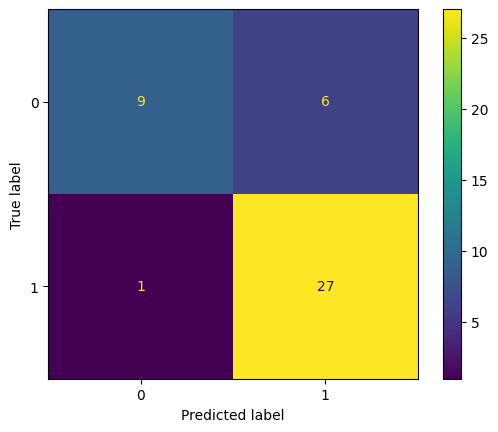

In [28]:
print(classification_report(y_test,y_pred1))
print(ConfusionMatrixDisplay.from_predictions(y_test,y_pred1))

In [27]:
#using Naive bayes 
from sklearn.naive_bayes import GaussianNB
nb=GaussianNB()
nb.fit(X_train,y_train)
y_pred2=nb.predict(X_test)
y_pred2

array([1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1])

              precision    recall  f1-score   support

           0       0.79      0.73      0.76        15
           1       0.86      0.89      0.88        28

    accuracy                           0.84        43
   macro avg       0.82      0.81      0.82        43
weighted avg       0.84      0.84      0.84        43



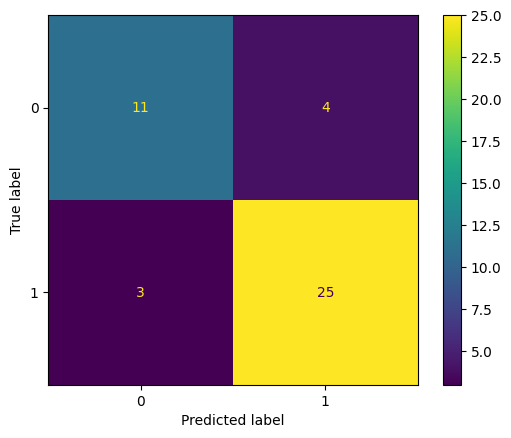

In [29]:
print(classification_report(y_test,y_pred2))
print(ConfusionMatrixDisplay.from_predictions(y_test,y_pred2))

Here we can see the accuracy score of SVM and Naive bayes models are same with a
score of 84%.

In [15]:
y.value_counts()

1    148
0     67
Name: status, dtype: int64

Here we can see that the target variable is highly imbalanced. Hence applying oversampling method which is **SMOTE**

In [31]:
from imblearn.over_sampling import SMOTE
sm=SMOTE()
X_train_sm,y_train_sm=sm.fit_resample(X_train,y_train)

In [33]:
y_train_sm.value_counts()

1    120
0    120
Name: status, dtype: int64

In [62]:
#KNN using resampled data
Knn_sm=KNeighborsClassifier(n_neighbors=5)
Knn_sm.fit(X_train_sm,y_train_sm)
y_pred3=Knn_sm.predict(X_test)
y_pred3

array([1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1])

              precision    recall  f1-score   support

           0       0.79      0.73      0.76        15
           1       0.86      0.89      0.88        28

    accuracy                           0.84        43
   macro avg       0.82      0.81      0.82        43
weighted avg       0.84      0.84      0.84        43



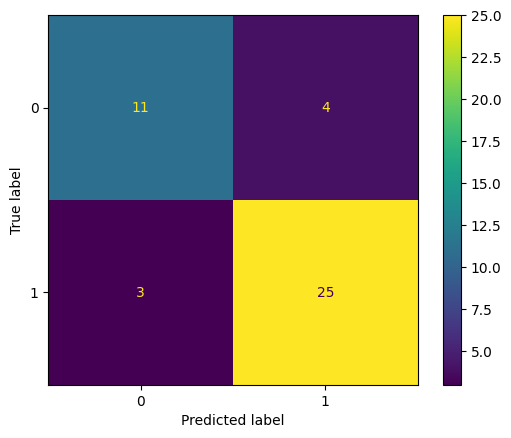

In [63]:
print(classification_report(y_test,y_pred3))
print(ConfusionMatrixDisplay.from_predictions(y_test,y_pred3))

In [60]:
#using SVM
from sklearn.svm import SVC
sv_sm=SVC()
sv_sm.fit(X_train_sm,y_train_sm)
y_pred4=sv_sm.predict(X_test)
y_pred4

array([1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1])

              precision    recall  f1-score   support

           0       0.80      0.80      0.80        15
           1       0.89      0.89      0.89        28

    accuracy                           0.86        43
   macro avg       0.85      0.85      0.85        43
weighted avg       0.86      0.86      0.86        43



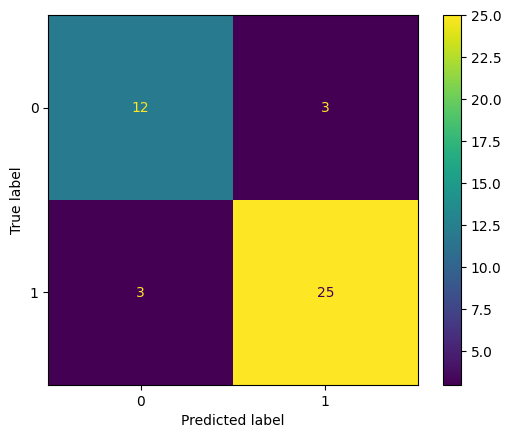

In [61]:
print(classification_report(y_test,y_pred4))
print(ConfusionMatrixDisplay.from_predictions(y_test,y_pred4))

In [57]:
#using Naive bayes 
from sklearn.naive_bayes import GaussianNB
nb_sm=GaussianNB()
nb_sm.fit(X_train_sm,y_train_sm)
y_pred5=nb_sm.predict(X_test)
y_pred5

array([1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1])

              precision    recall  f1-score   support

           0       0.75      0.80      0.77        15
           1       0.89      0.86      0.87        28

    accuracy                           0.84        43
   macro avg       0.82      0.83      0.82        43
weighted avg       0.84      0.84      0.84        43



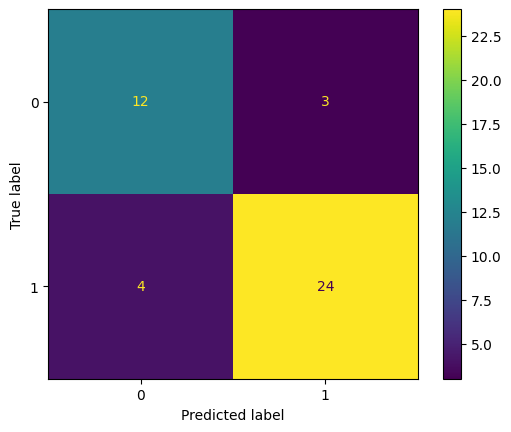

In [58]:
print(classification_report(y_test,y_pred5))
print(ConfusionMatrixDisplay.from_predictions(y_test,y_pred5))

After applying oversampling technique we can see that the accuracy of SVM has increased from 84 to 86%. Other remains the same.

Applying the undersamplimg technique.

In [43]:
from imblearn.under_sampling import RandomUnderSampler
us=RandomUnderSampler(random_state=1)
X_train_us,y_train_us=us.fit_resample(X_train,y_train)

In [68]:
y_train_us.value_counts()

0    52
1    52
Name: status, dtype: int64

In [55]:
#KNN using resampled data
Knn_us=KNeighborsClassifier(n_neighbors=5)
Knn_us.fit(X_train_us,y_train_us)
y_pred6=Knn_us.predict(X_test)
y_pred6

array([1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1,
       1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1])

              precision    recall  f1-score   support

           0       0.67      0.80      0.73        15
           1       0.88      0.79      0.83        28

    accuracy                           0.79        43
   macro avg       0.77      0.79      0.78        43
weighted avg       0.81      0.79      0.79        43



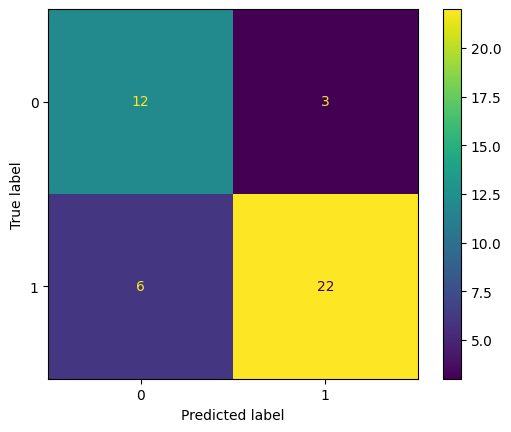

In [56]:
print(classification_report(y_test,y_pred6))
print(ConfusionMatrixDisplay.from_predictions(y_test,y_pred6))

In [64]:
#using SVM
sv_us=SVC()
sv_us.fit(X_train_us,y_train_us)
y_pred7=sv_us.predict(X_test)
y_pred7

array([1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1,
       1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1])

              precision    recall  f1-score   support

           0       0.63      0.80      0.71        15
           1       0.88      0.75      0.81        28

    accuracy                           0.77        43
   macro avg       0.75      0.78      0.76        43
weighted avg       0.79      0.77      0.77        43



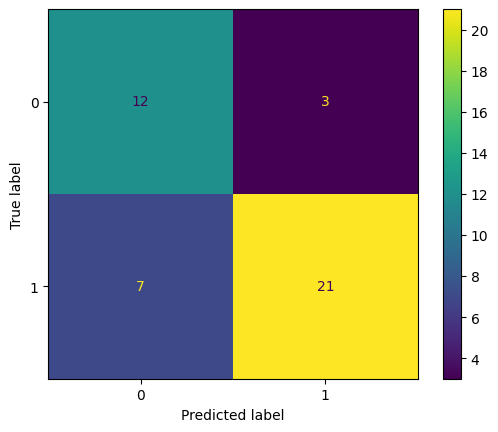

In [65]:
print(classification_report(y_test,y_pred7))
print(ConfusionMatrixDisplay.from_predictions(y_test,y_pred7))

In [66]:
#using Naive bayes 
nb_us=GaussianNB()
nb_us.fit(X_train_us,y_train_us)
y_pred8=nb_us.predict(X_test)
y_pred8

array([1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1,
       1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1])

              precision    recall  f1-score   support

           0       0.72      0.87      0.79        15
           1       0.92      0.82      0.87        28

    accuracy                           0.84        43
   macro avg       0.82      0.84      0.83        43
weighted avg       0.85      0.84      0.84        43



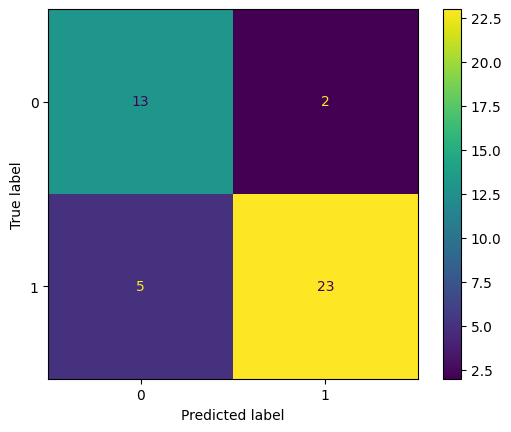

In [67]:
print(classification_report(y_test,y_pred8))
print(ConfusionMatrixDisplay.from_predictions(y_test,y_pred8))

After doing undersampling it is found that the accuracy scores of Knn and SVM has reduced.

The model with most accuracy is SVM which was resampled using SMOTE.

Hence predicting new values using **oversampled SVM** model

In [69]:
y_new=sv_sm.predict(ms.transform([[0,89,65,2,79,2,1,68,1,84]]))
if y_new==0:
  print("Not Placed")
else:
  print("Placed")

Placed
